### Aplicação do modelo de análise de sentimento no dataset de publicações do twitter

### Preparando o dataset

In [104]:
import pandas as pd
import numpy as np

# !pip install clean-text
# from cleantext import clean
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
# nltk.download('popular')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
# from string import punctuation
from nltk.stem.wordnet import WordNetLemmatizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# argentina = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/AR_data.csv')
# chile = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/CL_data.csv')
# equador = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/EQ_data.csv')
# espanha = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/ES_data.csv')
# mexico = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/MX_data.csv')

In [12]:
# mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65028 entries, 0 to 65027
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  65028 non-null  int64  
 1   text        65028 non-null  object 
 2   score       65028 non-null  float64
 3   retweet     65028 non-null  int64  
 4   like        65028 non-null  int64  
 5   date        65028 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 3.0+ MB


In [6]:
# argentina.head()

,Unnamed: 0,text,score,retweet,like,date,lat,long
0,0,La OMS estima que no habrá vacuna contra el co...,0.0,0,1,2020-02-11,-34.604450,-58.446244
1,1,"Coronavirus: covid-19, la enfermedad del nuevo...",0.0,0,0,2020-02-11,-34.604450,-58.446244
2,2,"No digas virus chino o enfermedad china, porqu...",0.0,0,0,2020-02-11,-34.604450,-58.446244
3,3,Coronavirus Covid-19: paciente contagiada fue ...,0.0,0,2,2020-02-12,-32.951572,-60.693506
4,4,Coronavirus Covid-19: paciente contagiada fue ...,0.0,1,1,2020-02-12,-32.951572,-60.693506


In [3]:
# incluindo a coluna país para concatenar todos os datasets em um

# lista = []
# for i in range(0,62117):
#   lista.append('argentina')
# argentina['país'] = lista

# lista = []
# for i in range(0,52650):
#   lista.append('chile')
# chile['país'] = lista

# lista = []
# for i in range(0,34587):
#   lista.append('equador')
# equador['país'] = lista

# lista = []
# for i in range(0,66176):
#   lista.append('espanha')
# espanha['país'] = lista

# lista = []
# for i in range(0,65028):
#   lista.append('mexico')
# mexico['país'] = lista

In [4]:
# publicacoes = pd.concat([argentina, chile, equador, espanha, mexico])

In [13]:
# publicacoes.head()

,Unnamed: 0,text,score,retweet,like,date,lat,long,país
0,0,La OMS estima que no habrá vacuna contra el co...,0.0,0,1,2020-02-11,-34.604450,-58.446244,argentina
1,1,"Coronavirus: covid-19, la enfermedad del nuevo...",0.0,0,0,2020-02-11,-34.604450,-58.446244,argentina
2,2,"No digas virus chino o enfermedad china, porqu...",0.0,0,0,2020-02-11,-34.604450,-58.446244,argentina
3,3,Coronavirus Covid-19: paciente contagiada fue ...,0.0,0,2,2020-02-12,-32.951572,-60.693506,argentina
4,4,Coronavirus Covid-19: paciente contagiada fue ...,0.0,1,1,2020-02-12,-32.951572,-60.693506,argentina


In [5]:
# removendo emoji

# publicacoes['text'] = publicacoes['text'].apply(lambda x: clean(x, no_emoji=True))

In [6]:
# tokenizando

# tt = TweetTokenizer()
# publicacoes['text'] = publicacoes['text'].apply(tt.tokenize)

In [7]:
# removendo stopwords e pontuações

# stopwords = set(stopwords.words('spanish') + list(punctuation))
# publicacoes['text'] = publicacoes['text'].apply(lambda x: ' '.join([word for word in x if word not in (stopwords)]))

In [8]:
# publicacoes.to_csv('publicacoes', index = False)

In [29]:
# publicacoes['text'].head()

0    [oms, estima, habra, vacuna, coronavirus, dent...
1    [coronavirus, covid, 19, enfermedad, nuevo, vi...
2    [digas, virus, chino, enfermedad, china, polit...
3    [coronavirus, covid, 19, paciente, contagiada,...
4    [coronavirus, covid, 19, paciente, contagiada,...
Name: text, dtype: object

In [2]:
publicacoes = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/publicacoes')
train = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/treino')

In [3]:
# TOKENIZAÇÃO
tk = Tokenizer()

# FIT ON TRAIN 
tk.fit_on_texts(train['review_es'].apply(str))

# TOKENIZANDO O DATASET DE TREINO
tk_publicacoes = tk.texts_to_sequences(publicacoes['text'].apply(str))

# PADDING A SEQUENCIA DE TREINO
publicacoes_pad = pad_sequences(tk_publicacoes,padding="post",maxlen = 725)

In [4]:
publicacoes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
dicionario = tk.word_index

### Carregando o modelo treinado

In [6]:
from keras.models import model_from_json

In [47]:
# load json and create model
json_file = open('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/model2.h5")
print("Loaded model from disk")

Loaded model from disk


In [48]:
predicao = loaded_model.predict(publicacoes_pad)

8768/8768 [==============================] - 1848s 211ms/step


In [49]:
lista = []
for i in range(0,280558):
  soma = 0
  for j in range(0,725):
    soma = predicao[i][j] + soma
  pontuacao = soma/725
  if pontuacao < 0.5:
    lista.append(0)
  else:
    lista.append(1)
publicacoes['prediction'] = lista

In [10]:
print(publicacoes[['text','prediction']])

                                                     text  prediction
0       oms estima habra vacuna coronavirus dentro 18 ...           1
1       coronavirus covid 19 enfermedad nuevo virus su...           1
2       digas virus chino enfermedad china politicamen...           1
3       coronavirus covid 19 paciente contagiada liber...           1
4       coronavirus covid 19 paciente contagiada liber...           1
...                                                   ...         ...
280553  @claudiashein si discriminacion hablamos hora ...           1
280554     malditas pruebas covid https://t.co/rd7adpqhnz           1
280555  @manumanuti hehehehe not surprised it's probab...           1
280556  amiguitos dio covid perdieron olfato gusto cua...           1
280557  buenos dias informamos motivos condiciones cli...           1

[280558 rows x 2 columns]


In [50]:
publicacoes['prediction'].value_counts()

1    174806
0    105752
Name: prediction, dtype: int64

In [52]:
# publicacoes.to_csv('publicacoes_final2', index = False)

In [53]:
# converte a coluna de date time

publicacoes['date'] = pd.to_datetime(publicacoes.date, format="%Y-%m-%d")

In [54]:
publicacoes['date'].min()

Timestamp('2020-02-11 00:00:00')

In [55]:
publicacoes['date'].max()

Timestamp('2021-12-31 00:00:00')

In [56]:
# selecionado um intervalo de tempo no dataset

import datetime

data_inicio = datetime.datetime(2020, 2, 1)
data_final = datetime.datetime(2020, 7, 31)

df_analise = publicacoes[(data_inicio <= publicacoes['date']) &  (data_final > publicacoes['date']) ]

In [58]:
# df_analise.to_csv('df_analise2', index = False)

### Teste de hipótese

É possível identificar os sintomas mais comuns da COVID por meio da análise das palavras mais frequentes das publicações do tweet?

In [2]:
df_analise = pd.read_csv('/content/drive/MyDrive/Blue Edtech 1semestre/Módulo 7/data/df_analise')

In [4]:
# tokenizando

tt = TweetTokenizer()
df_analise['text'] = df_analise['text'].apply(tt.tokenize)

In [9]:
# Lemmatise

lmtzr = WordNetLemmatizer()
df_analise['text'] = df_analise['text'].apply(lambda x: [lmtzr.lemmatize(word) for word in x])

In [11]:
df_analise['text']

0        [[, ', oms, ', ,, ', estima, ', ,, ', habra, '...
1        [[, ', coronavirus, ', ,, ', covid, ', ,, ', 1...
2        [[, ', digas, ', ,, ', virus, ', ,, ', chino, ...
3        [[, ', coronavirus, ', ,, ', covid, ', ,, ', 1...
4        [[, ', coronavirus, ', ,, ', covid, ', ,, ', 1...
                               ...                        
71121    [[, ', rusia, ', ,, ', podria, ', ,, ', aproba...
71122    [[, ', goberladrones, ', ,, ', oposicion, ', ,...
71123    [[, ', mexico, ', ,, ', to, ', ,, ', test, ', ...
71124    [[, ', coludos, ', ,, ', rabones, ', ,, ', #po...
71125    [[, ', secretaria, ', ,, ', salud, ', ,, ', so...
Name: text, Length: 71126, dtype: object

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

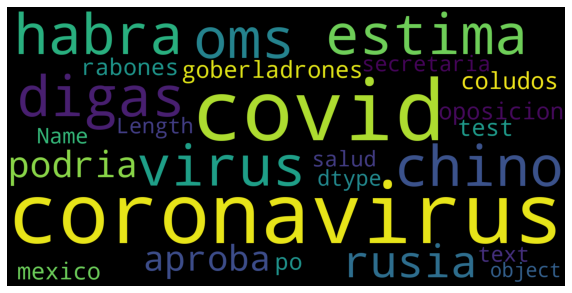

In [118]:
# gerar uma wordcloud
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800).generate(str(df_analise['text']))
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

Verificando as palavras de maior frequencia

In [70]:
lista_palavras = df_analise['text'].tolist()

In [143]:
str(lista_palavras).count('covid')

77087

In [144]:
str(lista_palavras).count('quedateencasa')

3668

In [145]:
str(lista_palavras).count('coronavirus')

10740

In [75]:
nltk.download('punkt')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [109]:
lista_palavras = str(lista_palavras)

In [110]:
lista_palavras = word_tokenize(lista_palavras)

In [111]:
fdist = FreqDist(word.lower() for word in lista_palavras)

In [105]:
stopwords = nltk.corpus.stopwords.words('spanish')

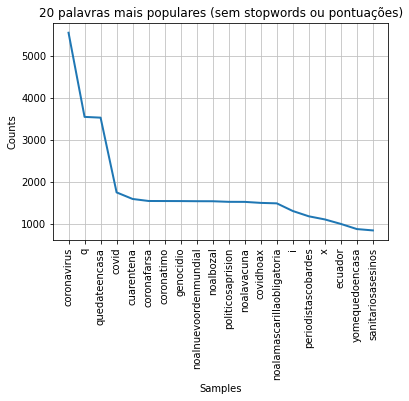

In [128]:
freq_sem_pontuacao_e_sem_stopwords = nltk.FreqDist(dict((word, freq) for word, freq in fdist.items() if word not in stopwords and word.isalpha()))
freq_sem_pontuacao_e_sem_stopwords.plot(20, title="20 palavras mais populares (sem stopwords ou pontuações)")

Montando gráfico de tendência de número de publicações negativas

In [124]:
df_analise

,text,score,retweet,like,date,lat,long,país,prediction
0,"[[, ', oms, ', ,, ', estima, ', ,, ', habra, '...",0.0,0,1,2020-02-11,-34.604450,-58.446244,argentina,1
1,"[[, ', coronavirus, ', ,, ', covid, ', ,, ', 1...",0.0,0,0,2020-02-11,-34.604450,-58.446244,argentina,0
2,"[[, ', digas, ', ,, ', virus, ', ,, ', chino, ...",0.0,0,0,2020-02-11,-34.604450,-58.446244,argentina,0
3,"[[, ', coronavirus, ', ,, ', covid, ', ,, ', 1...",0.0,0,2,2020-02-12,-32.951572,-60.693506,argentina,1
4,"[[, ', coronavirus, ', ,, ', covid, ', ,, ', 1...",0.0,1,1,2020-02-12,-32.951572,-60.693506,argentina,1
...,...,...,...,...,...,...,...,...,...
71121,"[[, ', rusia, ', ,, ', podria, ', ,, ', aproba...",0.0,0,0,2020-07-30,NaN,NaN,mexico,1
71122,"[[, ', goberladrones, ', ,, ', oposicion, ', ,...",0.0,1,0,2020-07-30,NaN,NaN,mexico,1
71123,"[[, ', mexico, ', ,, ', to, ', ,, ', test, ', ...",0.0,0,0,2020-07-30,NaN,NaN,mexico,0
71124,"[[, ', coludos, ', ,, ', rabones, ', ,, ', #po...",0.0,0,0,2020-07-30,NaN,NaN,mexico,1


In [18]:
df_analise['país'].value_counts()

espanha      15531
mexico       15065
chile        14500
argentina    13921
equador      12109
Name: país, dtype: int64

In [21]:
publi_neg = df_analise[df_analise['prediction'] == 0]

In [24]:
df_tendencia = publi_neg['date'].value_counts()

In [ ]:
df_tendencia = pd.DataFrame(df_tendencia)

In [30]:
df_tendencia = df_tendencia.reset_index()

In [148]:
df_tendencia

,index,date
0,2020-07-17,233
1,2020-06-15,231
2,2020-07-01,230
3,2020-07-23,230
4,2020-07-14,219
...,...,...
166,2020-02-19,5
167,2020-02-14,5
168,2020-02-22,4
169,2020-02-11,4


In [149]:
df_tendencia = df_tendencia.sort_values(by='index')

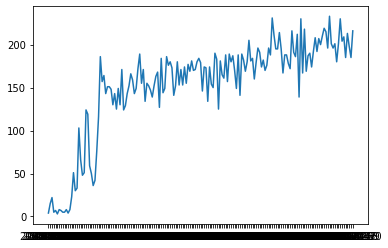

In [151]:
plt.plot(df_tendencia['index'], df_tendencia['date'])  
plt.show()  

Montando gráfico de tendencia de publicação negativas relativa ao numero total de publicações por dia

In [37]:
num_publi = df_analise['date'].value_counts()

In [40]:
num_publi = pd.DataFrame(num_publi)

In [41]:
num_publi = num_publi.reset_index()

In [152]:
num_publi

,index,date
0,2020-03-11,584
1,2020-03-03,548
2,2020-03-15,498
3,2020-07-03,498
4,2020-03-18,498
...,...,...
166,2020-02-21,18
167,2020-02-19,16
168,2020-02-14,12
169,2020-02-17,11


In [153]:
num_publi = num_publi.sort_values(by='index')

In [165]:
num_publi

,index,date
163,2020-02-11,26
158,2020-02-12,45
159,2020-02-13,39
168,2020-02-14,12
165,2020-02-15,19
...,...,...
140,2020-07-26,402
120,2020-07-27,449
115,2020-07-28,455
134,2020-07-29,414


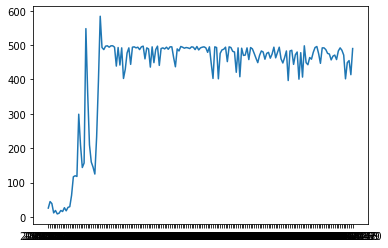

In [166]:
plt.plot(num_publi['index'], num_publi['date'])  
plt.show() 

In [66]:
pub_relativas = pd.DataFrame(df_tendencia['date']/num_publi['date']).reset_index()

In [67]:
pub_relativas

,index,date
0,0,0.398973
1,1,0.421533
2,2,0.461847
3,3,0.461847
4,4,0.439759
...,...,...
166,166,0.277778
167,167,0.312500
168,168,0.333333
169,169,0.363636


In [161]:
pub_relativas = pub_relativas.assign(index = num_publi['index'] )

In [162]:
pub_relativas = pub_relativas.sort_values(by='index')

In [163]:
pub_relativas

,index,date
163,2020-02-11,0.269231
158,2020-02-12,0.488889
159,2020-02-13,0.384615
168,2020-02-14,0.333333
165,2020-02-15,0.263158
...,...,...
140,2020-07-26,0.310945
120,2020-07-27,0.331849
115,2020-07-28,0.331868
134,2020-07-29,0.323671


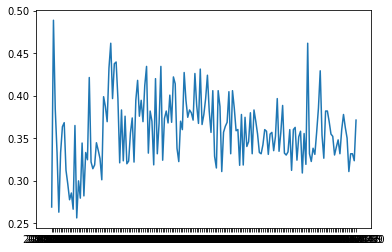

In [164]:
plt.plot(pub_relativas['index'], pub_relativas['date'])  
plt.show()  